## Import Library & Upload data

In [144]:
import pandas as pd
from glob import glob
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer


In [142]:
# Get a list of all CSV files in a directory
csv_files = glob('extracted_features/*.csv')

# Create an empty dataframe to store the combined data
data = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    data = pd.concat([data, df])

# Print the combined dataframe


## EDA Part

In [155]:
data.head(9)

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key,label
0,0.080182,1.639807,410.335062,1.719989,376.140473,0.0,11.0,48.0,1
1,0.079750,1.049657,470.346649,1.129407,470.346649,0.0,9.0,46.0,1
2,0.080642,0.996584,467.736733,1.077226,467.736733,0.0,7.0,56.0,1
3,0.078974,0.978144,303.648829,1.057118,303.648829,0.0,9.0,49.0,1
4,0.074179,0.883575,411.836653,0.957754,411.836653,0.0,9.0,44.0,1
5,0.077374,0.867656,678.498345,0.945030,678.498345,0.0,9.0,45.0,1
6,0.075928,0.797988,426.251968,0.873916,426.251968,0.0,7.0,47.0,1
7,0.074664,2.419462,360.985056,1.754489,351.960429,0.0,39.0,102.0,1
8,0.080745,0.711940,307.146295,0.792685,307.146295,0.0,7.0,44.0,1


In [156]:
len(data)

1760

In [157]:
data["label"].value_counts()

label
1    880
0    880
Name: count, dtype: int64

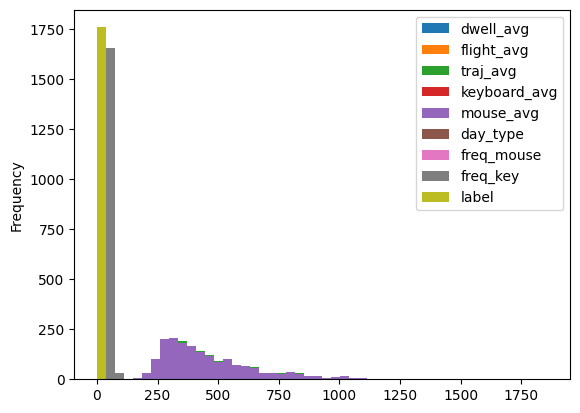

In [158]:
data.plot.hist(bins=50)
plt.show()

In [159]:
# calculate the corr
correlation = data.corr()
correlation

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key,label
dwell_avg,1.000000,0.212807,-0.207004,0.244630,-0.201533,-5.562126e-02,0.071887,-0.057050,2.633782e-02
flight_avg,0.212807,1.000000,-0.101507,0.958814,-0.116933,4.464992e-02,0.533938,0.236629,-8.527255e-03
traj_avg,-0.207004,-0.101507,1.000000,-0.105851,0.990362,7.795145e-03,-0.311188,-0.007171,-2.393195e-02
keyboard_avg,0.244630,0.958814,-0.105851,1.000000,-0.120678,3.567587e-02,0.467583,0.141321,-7.494742e-03
mouse_avg,-0.201533,-0.116933,0.990362,-0.120678,1.000000,-3.117235e-03,-0.327127,-0.013719,-3.946030e-02
day_type,-0.055621,0.044650,0.007795,0.035676,-0.003117,1.000000e+00,0.048436,-0.035382,8.892152e-17
freq_mouse,0.071887,0.533938,-0.311188,0.467583,-0.327127,4.843618e-02,1.000000,0.586726,2.698812e-02
freq_key,-0.057050,0.236629,-0.007171,0.141321,-0.013719,-3.538195e-02,0.586726,1.000000,1.147565e-02
label,0.026338,-0.008527,-0.023932,-0.007495,-0.039460,8.892152e-17,0.026988,0.011476,1.000000e+00


<Axes: >

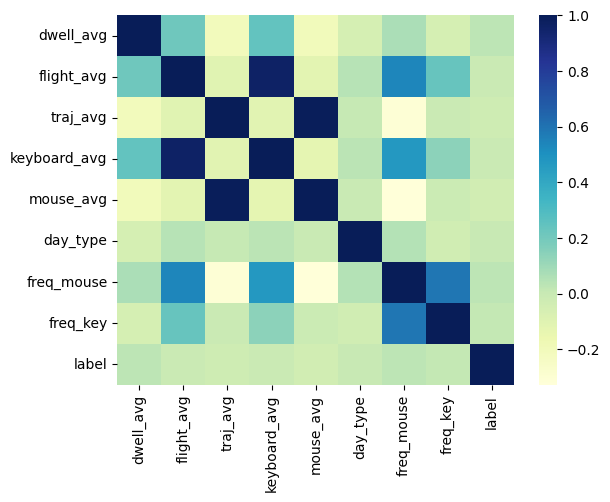

In [160]:
# visualize the correlations

sns.heatmap(correlation, cmap="YlGnBu")

## Check features relationship

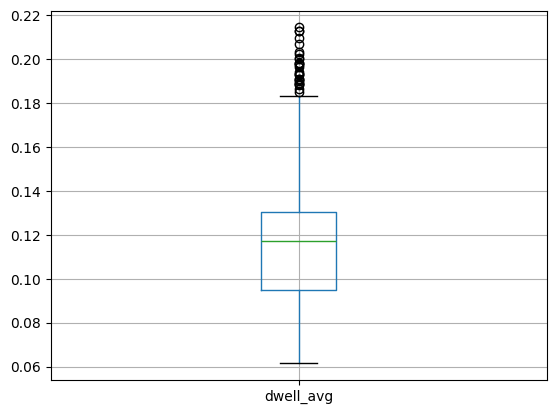

In [161]:
#min max scaling
data[['dwell_avg']].boxplot()
plt.show()

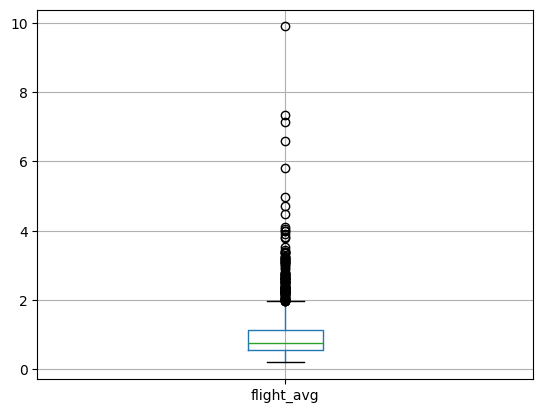

In [162]:
#min max
data[['flight_avg']].boxplot()
plt.show()

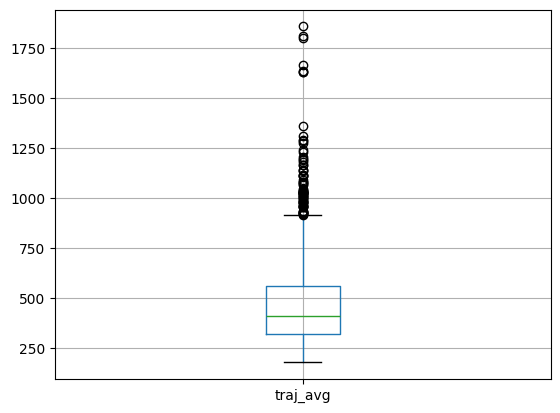

In [163]:
#min max
data[['traj_avg']].boxplot()
plt.show()

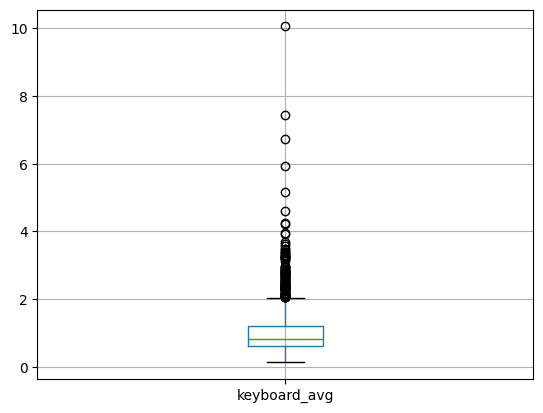

In [164]:
#min max
data[['keyboard_avg']].boxplot()
plt.show()

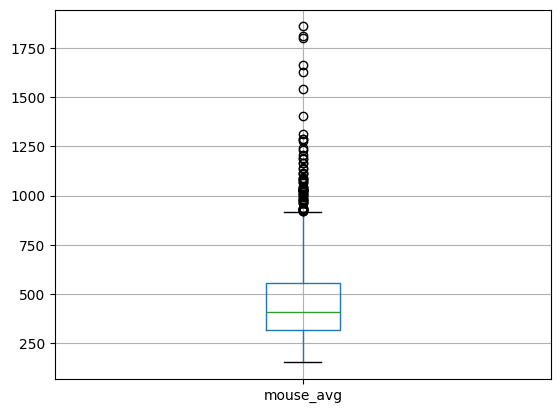

In [165]:
#min max
data[['mouse_avg']].boxplot()
plt.show()

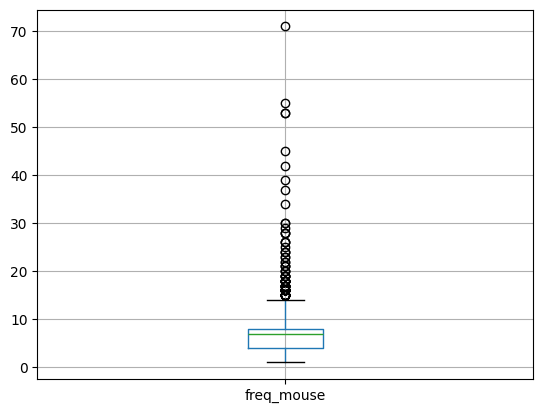

In [166]:

#min max
data[['freq_mouse']].boxplot()
plt.show()

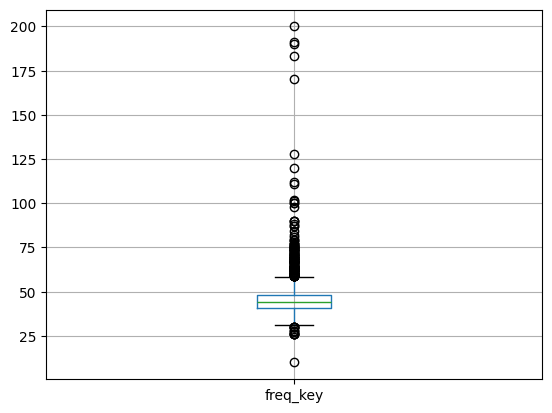

In [167]:
#min max
data[['freq_key']].boxplot()
plt.show()

## Scaling

In [145]:
num_transformer = MinMaxScaler()
cat_transformer = OneHotEncoder()


preproc = make_column_transformer(
    (num_transformer, ['dwell_avg',	'flight_avg', 'traj_avg', 'keyboard_avg', 'mouse_avg', 'freq_mouse', 'freq_key']),
    (cat_transformer, ['day_type'])
)

In [147]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preproc),
    ('classifier', RandomForestClassifier())
])

rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['dwell_avg', 'flight_avg',
                                                   'traj_avg', 'keyboard_avg',
                                                   'mouse_avg', 'freq_mouse',
                                                   'freq_key']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['day_type'])])),
                ('classifier', RandomForestClassifier())])

In [153]:
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preproc),
    ('classifier', SVC())
])

svc_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['dwell_avg', 'flight_avg',
                                                   'traj_avg', 'keyboard_avg',
                                                   'mouse_avg', 'freq_mouse',
                                                   'freq_key']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['day_type'])])),
                ('classifier', SVC())])

In [77]:
#one hot encoder
data[['day_type']].value_counts()


day_type
0.0         1380
1.0          380
Name: count, dtype: int64

## Model

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [132]:
#Random forest Model -- default data

# define X and y
X = data.drop(columns='label')
y = data['label']
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split test into validation set 15%
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# initialize  random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)



# Show result
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.6023


In [169]:
# random force with pipline

# Train Pipeline
rf_pipeline.fit(X_train,y_train)

# Make predictions
rf_pipeline.predict(X_test.iloc[0:1])

# Score model
rf_pipeline.score(X_test,y_test)


0.6022727272727273

In [135]:
##SVC Model -- default data

# define X and y
X = data.drop(columns='label')
y = data['label']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split test into validation set 15%
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# initialize  SVC model
svc_model = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', random_state=42)

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)



# Show result
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.4318


In [170]:
# random force with pipline

# Train Pipeline
svc_pipeline.fit(X_train,y_train)

# Make predictions
svc_pipeline.predict(X_test.iloc[0:1])

# Score model
svc_pipeline.score(X_test,y_test)


0.4943181818181818

In [137]:
# Define X and y
X = data.drop(columns='label')
y = data['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Show result
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.5739
